<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
from nltk.util import ngrams 
import nltk, re, string, collections
from nltk.corpus import stopwords
import pandas as pd
import unicodedata


In [ ]:
df = pd.read_csv('reviews.csv')
df.head()

,Unnamed: 0,Reviewer,Rating,Summary,Description
0,0,Krusshna,1.0,\nDo not buy iphone or expensive product from ...,\n\n Please do not buy expensive product like...
1,1,Sunny Kumar,1.0,\nDon’t buy it from this seller\n,\n\n Bought the mobile from appario retail lt...
2,2,Sunny Kumar,5.0,\nFirst Time iPhone User Review :-)\n,\n\n The iPhone design is good and the camera...
3,3,Amazon Customer,1.0,\nWorst Experience Ever.!\n,\n\n My Phone is Producing Too Much Heat Even...
4,4,Satyapal singh,1.0,\niPhone 11\n,"\n\n Defective product,got heat up within 5 m..."


In [ ]:
# clean the reviews
stop = stopwords.words('english')
df['Description'] = df['Summary'].apply(lambda x: x.replace(r"'", ''))
df['Description'] = df['Description'].apply(lambda x: x.replace(r'"', ''))
df['Description'] = df['Description'].apply(
    lambda x: x.replace(r'[\n\n\n\n\n\n\n\n\n\n  \n  \n    , \n  ', ''))
df['Description'] = df['Description'].apply(
    lambda x: x.replace(r'\n, \n  \n]', ''))
df['Description'] = df['Description'].apply(lambda x: x.lower())
df.Description = df.Description.apply(lambda x: re.sub(r'\w*\d', '', x))
df.Description = df.Description.str.replace('[^\w\s]', '')
df.Description = df.Description.apply(
    lambda x: ' '.join(x for x in x.split() if x not in stop))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


,Unnamed: 0,Reviewer,Rating,Summary,Description
0,0,Krusshna,1.0,\nDo not buy iphone or expensive product from ...,buy iphone expensive product amazom
1,1,Sunny Kumar,1.0,\nDon’t buy it from this seller\n,dont buy seller
2,2,Sunny Kumar,5.0,\nFirst Time iPhone User Review :-)\n,first time iphone user review
3,3,Amazon Customer,1.0,\nWorst Experience Ever.!\n,worst experience ever
4,4,Satyapal singh,1.0,\niPhone 11\n,iphone


In [ ]:
df.drop(['Unnamed: 0', 'Reviewer', 'Rating', 'Summary'], axis=1, inplace=True)

In [ ]:
df.head()

,Description
0,buy iphone expensive product amazom
1,dont buy seller
2,first time iphone user review
3,worst experience ever
4,iphone


In [ ]:
text = df.Description.values
text = ' '.join([review for review in text])



1. Count the frequency of all the N-grams (N=3)




In [ ]:

#1.1 Count the frequency of all the N-grams (N=3).

import nltk
nltk.download('punkt')
from textblob import TextBlob

def get_ngram(num):
  ngram_dict = {}

  for review in df['Description']:
    ngram_list = TextBlob(review).ngrams(num)
    if(len(ngram_list) > 0):
      for ngram in ngram_list:
        ngram_key = tuple(ngram)
        if ngram_key in ngram_dict:
          ngram_dict[ngram_key] += 1
        else:
          ngram_dict[ngram_key] = 1
  return(ngram_dict)

ngram_num = 3
trigram_dict = get_ngram(ngram_num)
trigram = pd.DataFrame.from_dict(trigram_dict, orient='index', columns=['Frequency'])
trigram.sample(100)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
                              Frequency
(buy, iphone, expensive)              1
(iphone, expensive, product)          1
(expensive, product, amazom)          1
(dont, buy, seller)                   2
(first, time, iphone)                 3
...                                 ...
(donate, reason, buy)                 1
(reason, buy, product)                1
(buy, product, red)                   1
(every, penny, spend)                 1
(noting, say, iphone)                 1

[3287 rows x 1 columns]


2. Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

In [ ]:


bigram_dict = get_ngram(2)
unigram_dict = get_ngram(1)

bigram_prob = {}
for bigram in bigram_dict:
  word = tuple((bigram[0],))
  count_bi = bigram_dict[bigram]
  count_uni = unigram_dict[word]
  prob = count_bi / count_uni
  bigram_prob[bigram] = prob

bigram_df = pd.DataFrame.from_dict(bigram_prob, orient='index', columns=['Bi-grams Probability'])
print(bigram_df)

                      Bi-grams Probability
(buy, iphone)                     0.064516
(iphone, expensive)               0.002445
(expensive, product)              0.307692
(product, amazom)                 0.002817
(dont, buy)                       0.591549
...                                    ...
(reason, buy)                     0.250000
(payment, issu)                   1.000000
(battery, issues)                 0.008621
(noting, say)                     1.000000
(say, iphone)                     0.500000

[4064 rows x 1 columns]


(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer
nlp = spacy.load("en")
file = open('reviews.csv', 'r', encoding='latin-1' )
data_file2 = nlp(file.read())
noun_phrases = []
for noun in data_file2.noun_chunks:
  noun_phrases.append(noun.text)
print(noun_phrases)
np_result = pd.DataFrame(noun_phrases, columns = ['noun_phrases'])
vector = CountVectorizer(ngram_range=(3,3), analyzer='word')
transform1 = vector.fit_transform(np_result['noun_phrases'].values.astype('U')) 
frequency = sum(transform1).toarray()[0]
npp_result = pd.DataFrame(frequency, index=vector.get_feature_names(), columns=['noun_phrases_Frequency'])
npp_result['noun_phrases_Probabilities'] = npp_result / npp_result.max()
npp_result.sample(100)

['Reviewer', 'Rating', 'Summary', 'Description', 'iphone', 'expensive product', 'Amazom', 'expensive product', 'iphone', 'Amazon', 'i', 'very bad exp', 'the charger cord', 'sound quality issues', 'Amazon initial', 'charger', 'box', 'i', 'it', 'they', 'the cord amount', 'i', 'a replacement', 'some days', 'they', 'me', 'they', 'responsibility', 'missing items', 'they', 'you', 'the email conversation', 'i', 'every thing', 'i', 'the call recordings', 'they', 'the phone replacement', 'the missing cord', 'any damage or quality issues', 'they', 'amazon', 'it', 'this seller', 'the mobile', 'appario retail ltd', 'Mobile', 'seconds', 'also camera modes', 'portrait mode', 'the stage light', 'mono options', 'i', 'apple customer care', 'they', 'the amazon customer care', 'me', 'they', 'a job card', 'report', 'apple service center', 'The nearest service center', '210km', 'my place', 'the amount', 'strain', 'you', 'anything', 'this seller', 'it', 'u', 'numerous complaints', 'this seller', 'What', 'th

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,noun_phrases_Frequency,noun_phrases_Probabilities
the sim but,1,0.019608
good pricepowerful processorgreat,1,0.019608
then nice decision,1,0.019608
experience battery life,1,0.019608
then the apple,1,0.019608
...,...,...
1093 mary soya,1,0.019608
purchase online plzz,1,0.019608
307 amazon customer,1,0.019608
itâ esim sim,1,0.019608


# **Question 2: Undersand TF-IDF and Document representation**

(40 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

To build the documents-terms weights (tf*idf) matrix bold text.

In [ ]:

tf2 = df.dropna()
tf1 = (tf2['Description'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index())
tf1.columns = ['Description','tf']
import numpy as np
#calculating tf*idf
for i,j in enumerate(tf1['Description']):
 tf1.loc[i,'idf'] = np.long(df.shape[0]/(len(df[df['Description'].str.contains(j, regex=False)])))
tf1['tf*idf'] = tf1['tf'] * tf1['idf']
tf1.sample(100) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,Description,tf,idf,tf*idf
29,heating,41.0,72.0,2952.0
917,response,3.0,1093.0,3279.0
567,powerful,4.0,820.0,3280.0
1557,general,1.0,3280.0,3280.0
939,fail,1.0,820.0,820.0
...,...,...,...,...
1236,flaunt,1.0,3280.0,3280.0
470,certified,1.0,3280.0,3280.0
568,durable,1.0,3280.0,3280.0
1201,mindblowing,2.0,1093.0,2186.0



To rank the documents with respect given to a query designed by using cosine similarity.

In [ ]:
import numpy as np
import numpy.linalg as LA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords

list = df['Description'].values.tolist() 
mytext = "I love the iphone. It is  the best quality of iphone.The features are great." 
mytext = [mytext]
stop_Words = stopwords.words('english')
vectorizer = CountVectorizer(stop_words = stop_Words)
transformer = TfidfTransformer()
list_Vectorizer_Array = vectorizer.fit_transform(list).toarray()
query_Vectorizer_Array = vectorizer.transform(mytext).toarray()
cx = lambda a, b : np.inner(a, b)/(LA.norm(a)*LA.norm(b))
cosine_values = []
for vector in list_Vectorizer_Array:
        for testV in query_Vectorizer_Array:
            cosine = cx(vector, testV)
            cosine_values.append(cosine)
result = df.filter(['Description'], axis=1)
cv = pd.Series(cosine_values)
result['Cosine similarity'] = cv.values
result.sample(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


,Description,Cosine similarity
739,v nice,0.000000
2239,new iphone turn til,0.333333
734,charger good,0.000000
1885,good powerpoint missing,0.000000
710,iphone black patch,0.384900
...,...,...
898,good,0.000000
256,dont buy defective products,0.000000
308,amazon didnt provide cashback related offer phone,0.000000
2633,nice,0.000000


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

## Using Word2vec

In [ ]:
class W2VTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, size):
        self.size = size
        pass

    def fit(self, X, y=None):
        self.model = Word2Vec(min_count=1,
                              window=2,
                              size=self.size,
                              sample=6e-5,
                              alpha=0.03,
                              min_alpha=0.0007,
                              negative=20)
        sentences = [row.split() for row in X]

        self.model.build_vocab(sentences)
        self.model.train(
            sentences, total_examples=self.model.corpus_count, epochs=self.model.epochs)
        return self

    def get_vector(self, sentence):
        relevant_words_vectors = [self.model.wv[x]
                                  for x in sentence.split() if x in self.model.wv.vocab]
        if not relevant_words_vectors:
            return np.zeros(self.model.vector_size)  # .astype('float32')
        return np.mean(relevant_words_vectors, axis=0)

    def transform(self, X):
        arr = np.array([])
        for elem in X:
            arr = np.concatenate([arr, self.get_vector(elem)])
        return arr.reshape(-1, self.size)


In [ ]:
vectorizer = W2VTransformer(4)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [ ]:
sequential = fit_sequential(X_train_vectorized, X_test_vectorized)


Epoch 1/20
224/235 [===========================>..] - ETA: 0s - loss: 1.2616 - accuracy: 0.5485
Epoch 1: val_accuracy improved from -inf to 0.57600, saving model to best_model.h5
235/235 [==============================] - 1s 3ms/step - loss: 1.2609 - accuracy: 0.5489 - val_loss: 1.1836 - val_accuracy: 0.5760
Epoch 2/20
220/235 [===========================>..] - ETA: 0s - loss: 1.2436 - accuracy: 0.5555
Epoch 2: val_accuracy did not improve from 0.57600
235/235 [==============================] - 1s 3ms/step - loss: 1.2444 - accuracy: 0.5545 - val_loss: 1.1791 - val_accuracy: 0.5760
Epoch 3/20
215/235 [==========================>...] - ETA: 0s - loss: 1.2335 - accuracy: 0.5589
Epoch 3: val_accuracy did not improve from 0.57600
235/235 [==============================] - 1s 3ms/step - loss: 1.2355 - accuracy: 0.5580 - val_loss: 1.1757 - val_accuracy: 0.5760
Epoch 4/20
221/235 [===========================>..] - ETA: 0s - loss: 1.2267 - accuracy: 0.5588
Epoch 4: val_accuracy did not improve 

In [ ]:
pca = PCA(n_components=2)
X_train_vectorized_2d = pca.fit_transform(X_train_vectorized)


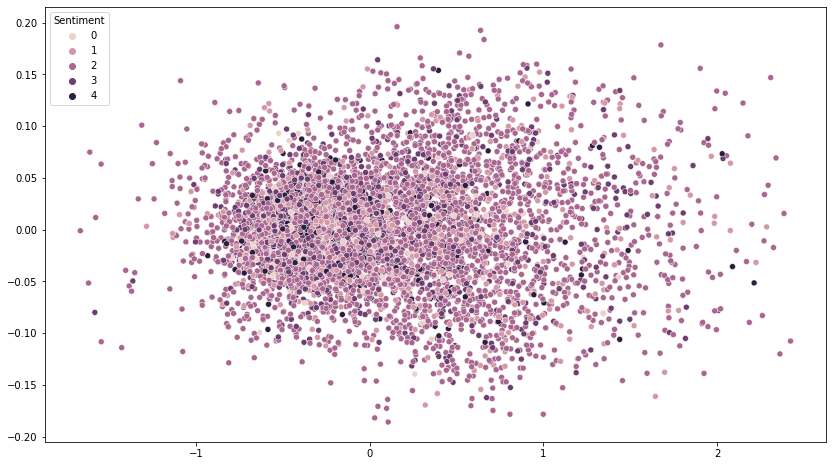

In [ ]:
plt.figure(figsize=(14, 8))
_ = sns.scatterplot(
    X_train_vectorized_2d[:, 0], X_train_vectorized_2d[:, 1], hue=y_train)


Even though the scatterplot is not showing us the "neutral" points we can see that indeed there is not much of a separation between the classes

with the same preprocessing as before but using a neural network, the results are slightly better. It looks like we need to change the preprocessing in such a way that we start using the order between the words. A very first simple method, before we try more complex stuff like Word2Vec or LDA, would be adding 2-grams.

## Using BERT

In [ ]:
model_class, tokenizer_class, pretrained_weights = (
    transformers.DistilBertModel, transformers.DistilBertTokenizer, 'distilbert-base-uncased')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
kaggle_test = pd.read_csv("test.tsv", sep='\t', index_col="PhraseId")

all_sentences = X_train.append([X_test, kaggle_test.Phrase])

tokenized = all_sentences.apply(
    lambda x: tokenizer.encode(x, add_special_tokens=True))

max_len = max(tokenized.apply(len))
padded = np.array([row + [0]*(max_len-len(row)) for row in tokenized])

attention_mask = np.where(padded != 0, 1, 0)

input_ids = torch.tensor(padded)
input_ids = torch.tensor(input_ids).to(torch.int64)

attention_mask = torch.tensor(attention_mask)

vector_length = model(input_ids[:1], attention_mask=attention_mask[:1])[
    0].shape[2]

vectors = np.zeros(shape=(0, vector_length))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


We're using an already trained version of distilBERT. In order to create the embedding, this has to be done in batches. For example through the below function:

In [ ]:
def get_vectors():
    start = time.time()
    k = 1000
    for i in range(0, len(all_sentences), k):
        with torch.no_grad():
            last_hidden_states = model(
                input_ids[i:i+k], attention_mask=input_ids[i:i+k])
        vectors = np.concatenate([vectors, last_hidden_states[0].numpy(
        )[:, 0, :]]) if i > 0 else last_hidden_states[0].numpy()[:, 0, :]
    return vectors


Doing so in a CPU can be highly time consuming (A way of speeding it up could be to use much less precision-numbers). I already saved the data.

In [ ]:
if os.path.isfile("bert_vectors.csv"):
    bert_vectors_df = pd.read_csv("bert_vectors.csv")
    vectors = bert_vectors_df.iloc[:, 1:]
elif os.path.isfile("bert_vectors.pickle"):
    with open('bert_vectors.pickle', 'rb') as handle:
        vectors = pickle.load(handle)
else:
    vectors = get_vectors()
    with open('bert_vectors.pickle', 'wb') as handle:
        pickle.dump(vectors, handle)


In [ ]:
X_train_vectorized = vectors[:len(X_train)]
X_test_vectorized = vectors[len(X_train):len(X_train)+len(X_test)]
kaggle_test_vectorized = vectors[len(X_train)+len(X_test):]


(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file

# Link:https://github.com/souravripunjay6/Reviews_segmentation/blob/main/reviews_segmentation.csv